# Setups

In [32]:
# import modules 
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

In [29]:
# path setup
datadir = '../../bubble_sizes/Rbubble_lists/bubble_sim_final/'    # Path to the directory containing the bubble lists
dir_bg_z8_muv=datadir+'bg_muv_z8/'  # dir for galaxy bubble list [Muv-Rbub] of rapid reionization model (bg), z=8, xHI=0.1-0.9
dir_fg_z8_muv=datadir+'fg_muv_z8/'  # dir for galaxy bubble list [Muv-Rbub] of gradual reionization model (fg), z=8, xHI=0.1-0.9
dir_bg_z8_od=datadir+'bg_od_z8/' # dir for overdensity bubble list [overdensity-Rbub]
dir_fg_z8_od=datadir+'fg_od_z8/'
dir_bg_z8_rall=datadir+'bg_rall_z8/' # dir for full box bubble list [Rbub]
dir_fg_z8_rall=datadir+'fg_rall_z8/'
os.listdir(dir_bg_z8_muv) # try to list the files in the directory

['xH_nohalos_z008.00_nf0.199022_eff2720.3_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.499813_eff1638.5_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.695461_eff1092.6_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.399706_eff1936.8_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.097615_eff3444.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.299324_eff2279.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.591873_eff1381.7_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.796971_eff790.3_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_1024_1600Mpc_muv_r_short',
 'xH_nohalos_z008.00_nf0.898362_eff441.5_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_102

# Demo

## check xHI of bubble lists in a folder

In [19]:
dirin=dir_bg_z8_muv # choose the directory to read
for i,fil in enumerate(np.sort(os.listdir(dirin))): # loop over the files in the directory
    ind=fil.find('nf') # find the index of the string 'nf'
    xHI=float(fil[ind+2:ind+6]) # extract the xHI value from the file name
    print(xHI)

0.09
0.19
0.29
0.39
0.49
0.59
0.69
0.79
0.89


## read bubble lists 

In [22]:
# parameter setup
models=['bg','fg']
zs=[8]

### read and plot galaxy Muv-Rbub bubble list

In [27]:
muvbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    muvbublist[mod]={} 
    for z in zs: # loop over redshifts
        muvbublist[mod][str(z)]={} 
        boxdir=vars()['boxdir_'+mod+'_z'+str(z)+'_muv']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            muvbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=np.vstack((data['Muv'],data['R_cMpc'])).T, columns=['Muv','R_cMpc'])

#### Plot bubble size distribution for xHI=0.5, Muv=-18 galaxies 

Text(0, 0.5, 'Bubble size distribution, $\\mathrm{dP/dlogR}$')

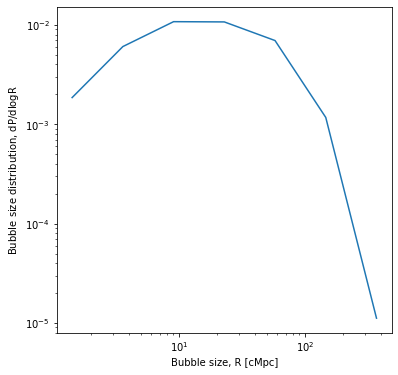

In [35]:
z=8
xHI=0.5
mod='fg' # gradual reionization model

df=muvbublist[mod][str(z)][str(xHI)]
Muvs=df.Muv 
Rbubs=df.R_cMpc
bins=np.logspace(np.log10(0.8),np.log10(1.1*np.max(Rbubs)),8) # define the bins for the histogram

Rbub18=Rbubs[(Muvs>-18.1)&(Muvs<-17.9)] # select the bubble list for Muv=-18



PRhist, Rhistedge =np.histogram(Rbub18,density=True,bins=bins)  # calculate the histogram
Rhist=0.5*(Rhistedge[:-1] + Rhistedge[1:]) # calculate the bin centers
yy=PRhist*Rhist # calculate the y values for the dP/dlogR plot

PlogR_norm=yy/np.trapz(yy,x=Rhist) # normalize the distribution

# plot the distribution
plt.figure(figsize=(6,6))
plt.plot(Rhist,PlogR_norm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Bubble size, R [cMpc]')
plt.ylabel(r'Bubble size distribution, $\mathrm{dP/dlogR}$')


## read overdensity bubble list

In [40]:
odbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    odbublist[mod]={} 
    for z in zs: # loop over redshifts
        odbublist[mod][str(z)]={} 
        boxdir=vars()['boxdir_'+mod+'_z'+str(z)+'_od']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            odbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=np.vstack((data['Overdensity'],data['R_cMpc'])).T, columns=['Overdensity','R_cMpc'])

### plot overdensity distribution

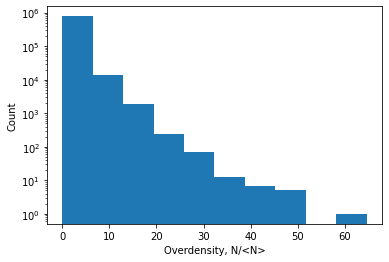

In [44]:
df=odbublist['fg']['8']['0.5']
plt.hist(df.Overdensity)
plt.xlabel('Overdensity, N/<N>')
plt.ylabel('Count')
plt.yscale('log')

## read full box bubble list 

In [47]:
fullbublist={} # dictionary to store the bubble lists
for mod in models: # loop over reionization models
    fullbublist[mod]={} 
    for z in zs: # loop over redshifts
        fullbublist[mod][str(z)]={} 
        boxdir=vars()['boxdir_'+mod+'_z'+str(z)+'_rall']
        boxfils=np.sort(os.listdir(boxdir))

        for i,fil in enumerate(boxfils):
            ind=fil.find('nf')
            xHI=np.round(float(fil[ind+2:ind+6]),1)
            #print('reading model '+mod+', z='+str(z)+', xHI='+str(xHI))
            data=pd.read_csv(boxdir+fil)
            fullbublist[mod][str(z)][str(xHI)]=pd.DataFrame(data=(data['R_cMpc']), columns=['R_cMpc'])

### plot the bubble size distribution for the full box at xHI=0.5

Text(0, 0.5, 'Bubble size distribution, $\\mathrm{dP/dlogR}$')

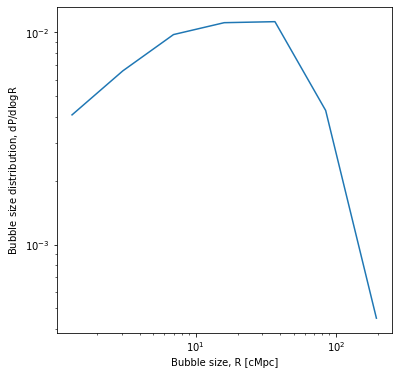

In [48]:
z=8
xHI=0.5
mod='fg' # gradual reionization model

df=fullbublist[mod][str(z)][str(xHI)]
Rbubs=df.R_cMpc
bins=np.logspace(np.log10(0.8),np.log10(1.1*np.max(Rbubs)),8) # define the bins for the histogram


PRhist, Rhistedge =np.histogram(Rbubs,density=True,bins=bins)  # calculate the histogram
Rhist=0.5*(Rhistedge[:-1] + Rhistedge[1:]) # calculate the bin centers
yy=PRhist*Rhist # calculate the y values for the dP/dlogR plot

PlogR_norm=yy/np.trapz(yy,x=Rhist) # normalize the distribution

# plot the distribution
plt.figure(figsize=(6,6))
plt.plot(Rhist,PlogR_norm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Bubble size, R [cMpc]')
plt.ylabel(r'Bubble size distribution, $\mathrm{dP/dlogR}$')